In [ ]:
!pip install textblob nltk vaderSentiment
nltk.download('punkt')

In [1]:
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

#device = 0 if torch.cuda.is_available() else -1
#device

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
filepath = r"combined_dfv4.csv"
df = pd.read_csv(filepath, dtype=str).sort_values(by='Survey ID')
#df
df['Combined Text'] = df['Combined Text'].astype(str)

In [ ]:
# Add a new column for the number of sentences in the 'Combined Text' column
df['sentence_count'] = df['Combined Text'].apply(count_sentences)

# Display the updated DataFrame
print(df[['Combined Text', 'sentence_count']].head())
df.to_excel("combined_df_Annotation_Test.xlsx", index=False)

 Text Blob/
 TextBlob Naive Bayes/
 NLTK VADER

In [9]:
def textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def textblob_naive_bayes_sentiment(text):
    blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
    return blob.sentiment.classification

def nltk_vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(text)
    return vs['compound']

In [ ]:
import pandas as pd

# Step 1: Convert the "Response Date" column to datetime if necessary
df['Response Date'] = pd.to_datetime(df['Response Date'])

# Step 2: Filter the DataFrame to include only records where the "Response Date" is in April 2024
filtered_df = df[df['Response Date'].dt.to_period('M') == '2024-04']

# Step 3: Sample 1000 records from the filtered DataFrame
sampled_df = filtered_df.sample(n=1000, random_state=42)

# Display the sampled DataFrame
print(sampled_df['Response Date'])

In [13]:
#sampled_df = df.sample(n=1000, random_state=42)
#sampled_df=pd.read_csv('sentiment_analysis_output[WD].csv')
#sampled_df['Combined Text'] = sampled_df['Combined Text'].astype(str)

In [11]:
sampled_df['TextBlob_Sentiment'] = sampled_df['Combined Text'].apply(textblob_sentiment)

sampled_df['TextBlob_NaiveBayes_Sentiment'] = sampled_df['Combined Text'].apply(textblob_naive_bayes_sentiment)
#25mins for 1000 rows

sampled_df['NLTK_Vader_Sentiment'] = sampled_df['Combined Text'].apply(nltk_vader_sentiment)

In [13]:
sampled_df.to_csv('SA output v2[WD].csv', index=False)

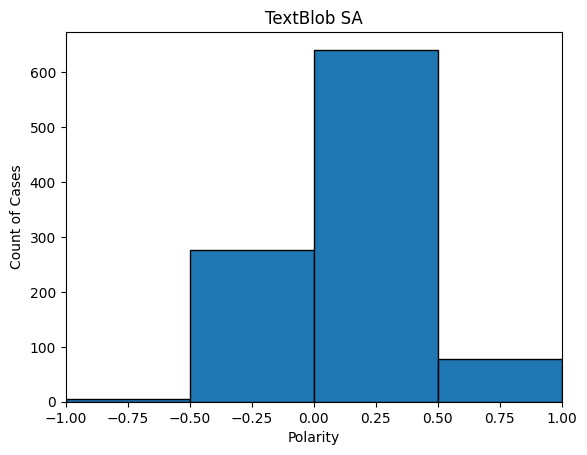

In [12]:
import matplotlib.pyplot as plt

# Define the bins
bins = [-1, -0.5, 0, 0.5, 1]

# Create the histogram
hist, bin_edges = np.histogram(sampled_df['TextBlob_Sentiment'], bins=bins)

# Plot the bar chart
plt.bar(bin_edges[:-1], hist, width=0.5, edgecolor='black', align='edge')

# Set the labels and title
plt.xlabel('Polarity')
plt.ylabel('Count of Cases')
plt.title('TextBlob SA')

# Set the x-axis limits
plt.xlim(-1, 1)

# Show the plot
plt.show()

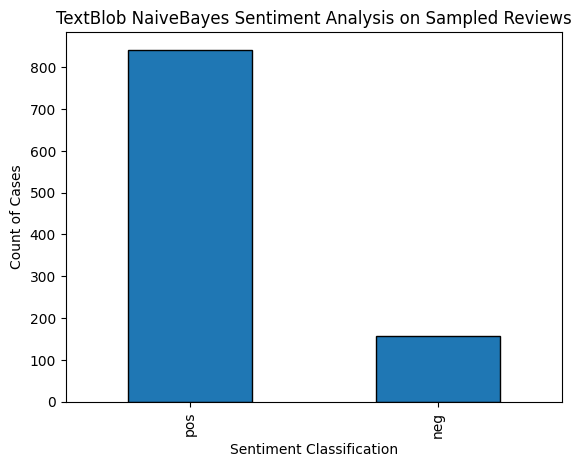

In [14]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment classification
sentiment_counts = sampled_df['TextBlob_NaiveBayes_Sentiment'].value_counts()

# Plot the bar chart
sentiment_counts.plot(kind='bar', edgecolor='black')

# Set the labels and title
plt.xlabel('Sentiment Classification')
plt.ylabel('Count of Cases')
plt.title('TextBlob NaiveBayes Sentiment Analysis on Sampled Reviews')

# Show the plot
plt.show()

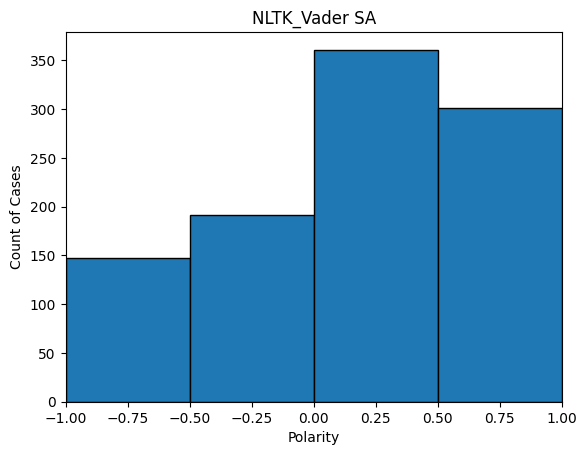

In [15]:
import matplotlib.pyplot as plt

# Define the bins
bins = [-1, -0.5, 0, 0.5, 1]

# Create the histogram
hist, bin_edges = np.histogram(sampled_df['NLTK_Vader_Sentiment'], bins=bins)

# Plot the bar chart
plt.bar(bin_edges[:-1], hist, width=0.5, edgecolor='black', align='edge')

# Set the labels and title
plt.xlabel('Polarity')
plt.ylabel('Count of Cases')
plt.title('NLTK_Vader SA')

# Set the x-axis limits
plt.xlim(-1, 1)

# Show the plot
plt.show()

Post SA Output Representation & Evaluation

In [ ]:
sampled_df.to_csv('sentiment_analysis_output[WD].csv', index=False)


In [7]:
###########get df after sentiment analysis
#df_sa=pd.read_csv('sentiment_analysis_output[WD].csv')
df_sa=pd.read_csv('SA output v2[WD].csv')
    
df_sa['Sentiment_Label_TB'] = df_sa['TextBlob_Sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)
df_sa['Sentiment_Label_TB_NB'] = df_sa['TextBlob_NaiveBayes_Sentiment'].apply(lambda x: 'Positive' if x == 'pos' else 'Negative')
df_sa['Sentiment_Label_VADER'] = df_sa['NLTK_Vader_Sentiment'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


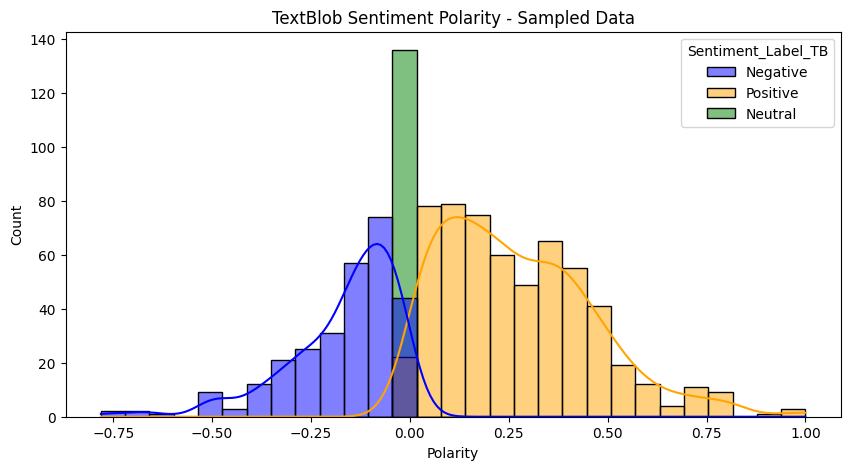

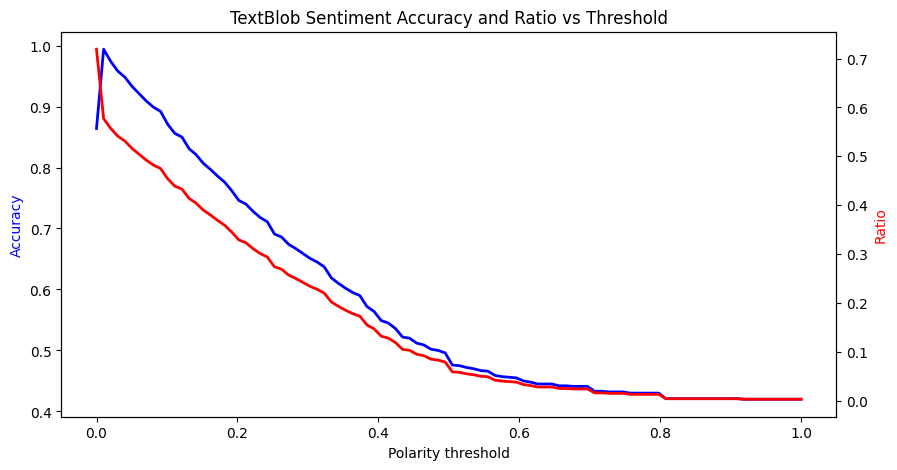

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot the distribution
plt.figure(figsize=(10, 5))

# Histogram of sentiment polarity
sns.histplot(data=df_sa, x='TextBlob_Sentiment', hue='Sentiment_Label_TB', kde=True, palette={"Positive": "orange", "Negative": "blue","Neutral":"green"})

plt.title("TextBlob Sentiment Polarity - Sampled Data")
plt.xlabel("Polarity")
plt.ylabel("Count")
plt.show()


# Generate accuracy and ratio based on thresholds
thresholds = np.linspace(0, 1, 100)
accuracy = []
neg_pos_ratio = []

for threshold in thresholds:
    predicted_pos = df_sa['TextBlob_Sentiment'] >= threshold
    actual_pos = df_sa['Sentiment_Label_TB'] == 'Positive'
    
    acc = (predicted_pos == actual_pos).mean()
    ratio = predicted_pos.mean()
    
    accuracy.append(acc)
    neg_pos_ratio.append(ratio)

# Plot the accuracy and ratio
fig, ax1 = plt.subplots(figsize=(10, 5))

# Accuracy plot
ax1.plot(thresholds, accuracy, 'b-', label='Accuracy (neg/pos)', linewidth=2)
ax1.set_xlabel('Polarity threshold')
ax1.set_ylabel('Accuracy', color='b')

# Share x-axis for ratio
ax2 = ax1.twinx()
ax2.plot(thresholds, neg_pos_ratio, 'r-', label='Ratio (neg/pos vs all)', linewidth=2)
ax2.set_ylabel('Ratio', color='r')

plt.title('TextBlob Sentiment Accuracy and Ratio vs Threshold')
plt.show()


Comparing SA output with True label

In [56]:
def score_to_sentiment(row):
    if not pd.isna(row['LTR']):
        # Use LTR (0-10)
        if row['LTR'] <= 3:
            return 'Negative'
        elif row['LTR'] <= 6:
            return 'Neutral'
        else:
            return 'Positive'
    elif not pd.isna(row['Star Rating']):
        # Use Star_Rating (1-5)
        if row['Star_Rating'] <= 2:
            return 'Negative'
        elif row['Star_Rating'] == 3:
            return 'Neutral'
        else:
            return 'Positive'
    else:
        return 'Unknown'  
    
df_sa['True_Label'] = df_sa.apply(score_to_sentiment, axis=1)


print(df_sa[['LTR', 'Star Rating', 'True_Label']].sample(20))
#print random enties to validate the labels


     LTR  Star Rating True_Label
908    5          NaN    Neutral
785   10          5.0   Positive
201   10          NaN   Positive
366    7          NaN   Positive
992   10          5.0   Positive
744    8          NaN   Positive
893    9          NaN   Positive
960    0          NaN   Negative
292    4          NaN    Neutral
410    5          NaN    Neutral
669    3          NaN   Negative
142    8          NaN   Positive
861    7          NaN   Positive
407   10          NaN   Positive
327    4          2.0    Neutral
951    0          NaN   Negative
91     8          NaN   Positive
676   10          5.0   Positive
688    8          NaN   Positive
810    1          NaN   Negative


In [8]:
#redefine the "true label" - adjust threshold
def score_to_sentiment(row):
    if not pd.isna(row['LTR']):
        # Use LTR (0-10)
        if row['LTR'] <= 4:
            return 'Negative'
        else:
            return 'Positive'
    elif not pd.isna(row['Star Rating']):
        # Use Star_Rating (1-5)
        if row['Star_Rating'] <= 2:
            return 'Negative'
        else:
            return 'Positive'
    else:
        return 'Unknown'  
    
df_sa['True_Label'] = df_sa.apply(score_to_sentiment, axis=1)


print(df_sa[['LTR', 'Star Rating', 'True_Label']].sample(20))
#print random enties to validate the labels


     LTR  Star Rating True_Label
180   10          5.0   Positive
344    0          NaN   Negative
888   10          NaN   Positive
701    4          NaN   Negative
395   10          5.0   Positive
178    5          NaN   Positive
465    0          NaN   Negative
360    7          NaN   Positive
199    5          NaN   Positive
496    0          NaN   Negative
591   10          NaN   Positive
932    0          NaN   Negative
962   10          5.0   Positive
83     0          NaN   Negative
79     6          NaN   Positive
729   10          5.0   Positive
538    7          NaN   Positive
797   10          5.0   Positive
637    0          NaN   Negative
767    9          NaN   Positive


In [57]:
textblob_accuracy = accuracy_score(df_sa['True_Label'], df_sa['Sentiment_Label_TB'])
print("TextBlob Accuracy:", textblob_accuracy)

textblobnb_accuracy = accuracy_score(df_sa['True_Label'], df_sa['Sentiment_Label_TB_NB'])
print("TextBlob NB Accuracy:", textblobnb_accuracy)

vader_accuracy = accuracy_score(df_sa['True_Label'], df_sa['Sentiment_Label_VADER'])
print("VADER Accuracy:", vader_accuracy)


TextBlob Accuracy: 0.562
TextBlob NB Accuracy: 0.542
VADER Accuracy: 0.593


  True_Label  TextBlob  TextBlob_NB     VADER
0   Negative  0.506897     0.241379  0.617241
1    Neutral  0.129944     0.000000  0.231638
2   Positive  0.735460     0.885553  0.699812


C:\Users\Admin\AppData\Local\Temp\ipykernel_7856\2216064109.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_per_label = df.groupby(true_label_col).apply(lambda x: (x[model_col] == x[true_label_col]).mean())
C:\Users\Admin\AppData\Local\Temp\ipykernel_7856\2216064109.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_per_label = df.groupby(true_label_col).apply(lambda x: (x[model_col] 

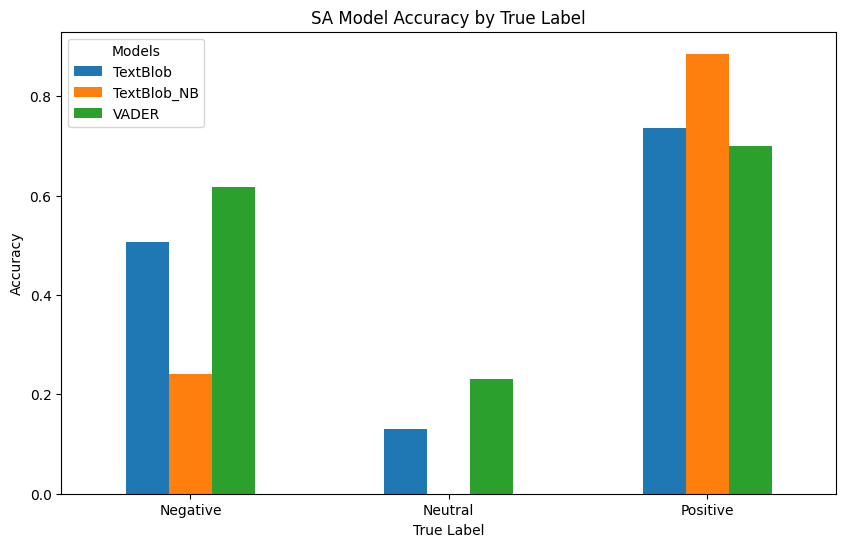

In [58]:
def calculate_accuracy_per_label(df, model_col, true_label_col):
    accuracy_per_label = df.groupby(true_label_col).apply(lambda x: (x[model_col] == x[true_label_col]).mean())
    return accuracy_per_label

textblob_accuracy_per_label = calculate_accuracy_per_label(df_sa, 'Sentiment_Label_TB', 'True_Label')
textblob_nb_accuracy_per_label = calculate_accuracy_per_label(df_sa, 'Sentiment_Label_TB_NB', 'True_Label')
vader_accuracy_per_label = calculate_accuracy_per_label(df_sa, 'Sentiment_Label_VADER', 'True_Label')

accuracy_df = pd.DataFrame({
    'TextBlob': textblob_accuracy_per_label,
    'TextBlob_NB': textblob_nb_accuracy_per_label,
    'VADER': vader_accuracy_per_label
}).reset_index()

print(accuracy_df)


accuracy_df.plot(x='True_Label', kind='bar', figsize=(10, 6))
plt.title('SA Model Accuracy by True Label')
plt.xlabel('True Label')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.legend(title='Models')
plt.show()


Train NB using True_Label

In [59]:
# Prepare data for Naive Bayes
X = df_sa['Combined Text']
y = df_sa['True_Label']

# Split dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Prepare data for Naive Bayes
X = df_sa['Combined Text']
y = df_sa['True_Label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to a numerical format using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)  # Fit and transform on training data
X_test_vectorized = vectorizer.transform(X_test)        # Transform on test data

# Train the Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_vectorized, y_train)

# Predict the labels for the test set
y_pred = nb.predict(X_test_vectorized)

# Add the predicted labels back to the original df_sa DataFrame
df_sa.loc[X_test.index, 'Predicted_Label_NB'] = y_pred


In [60]:
# Train Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_vectorized, y_train)

MultinomialNB()

In [61]:
y_pred = nb.predict(X_test_vectorized)
print("Naive Bayes accuracy:", accuracy_score(y_test, y_pred))
print("Naive Bayes classification report:")
print(classification_report(y_test, y_pred))

Naive Bayes accuracy: 0.71
Naive Bayes classification report:
              precision    recall  f1-score   support

    Negative       0.69      0.68      0.68        59
     Neutral       0.38      0.08      0.14        36
    Positive       0.74      0.94      0.83       105

    accuracy                           0.71       200
   macro avg       0.60      0.57      0.55       200
weighted avg       0.66      0.71      0.66       200



In [62]:
# Vectorize the entire dataset
X_full_vectorized = vectorizer.transform(df_sa['Combined Text'])  # Use the same vectorizer

# Make predictions for the entire dataset
df_sa['Predicted_Label_NB'] = nb.predict(X_full_vectorized)


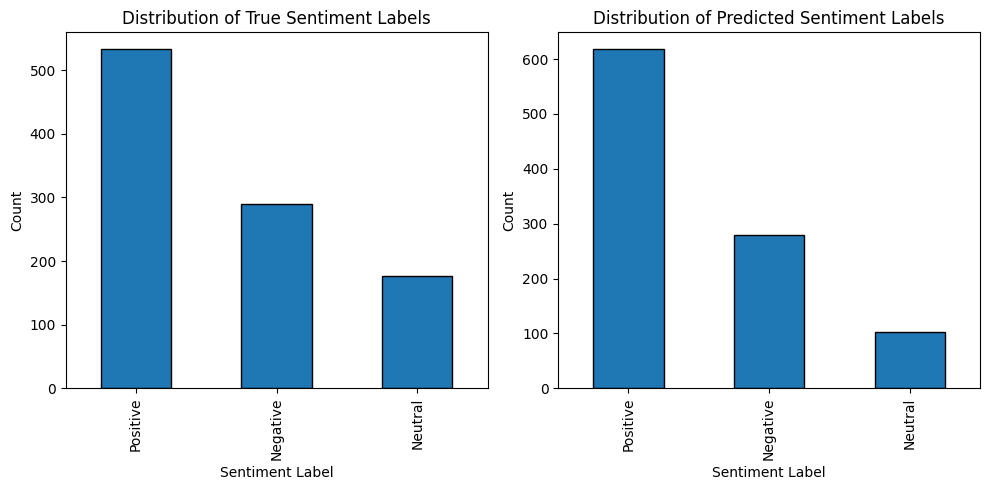

In [63]:
import matplotlib.pyplot as plt

# Step 1: Count the occurrences of each sentiment label in the True_Label and Predicted_Label_NB columns
true_label_counts = df_sa['True_Label'].value_counts()
predicted_label_counts = df_sa['Predicted_Label_NB'].value_counts()

# Step 2: Plot the distribution using a bar chart

# Plot the distribution of True Labels
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
true_label_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of True Sentiment Labels')

# Plot the distribution of Predicted Labels
plt.subplot(1, 2, 2)
predicted_label_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of Predicted Sentiment Labels')

# Show the plots
plt.tight_layout()
plt.show()

In [64]:
textblobnb_accuracy_afterTrain = accuracy_score(df_sa['True_Label'], df_sa['Predicted_Label_NB'])
print("TextBlob NB New Accuracy:", textblobnb_accuracy_afterTrain)

TextBlob NB New Accuracy: 0.855


In [53]:
df_sa.to_csv('SA_review_predicted_output.csv', index=False)

  True_Label  TextBlob        NB     VADER
0   Negative  0.506897  0.831034  0.617241
1    Neutral  0.129944  0.519774  0.231638
2   Positive  0.735460  0.979362  0.699812


C:\Users\Admin\AppData\Local\Temp\ipykernel_7856\2415085971.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_per_label = df.groupby(true_label_col).apply(lambda x: (x[model_col] == x[true_label_col]).mean())
C:\Users\Admin\AppData\Local\Temp\ipykernel_7856\2415085971.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_per_label = df.groupby(true_label_col).apply(lambda x: (x[model_col] 

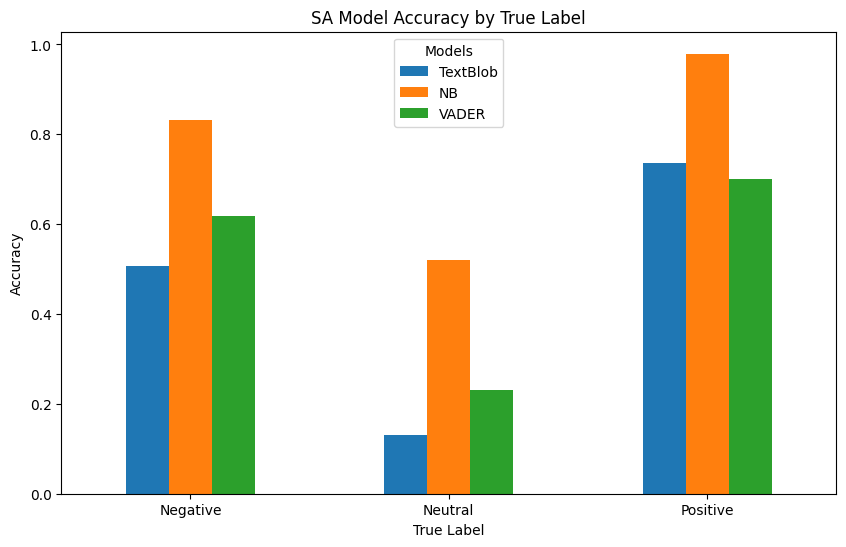

In [65]:
def calculate_accuracy_per_label(df, model_col, true_label_col):
    accuracy_per_label = df.groupby(true_label_col).apply(lambda x: (x[model_col] == x[true_label_col]).mean())
    return accuracy_per_label

textblob_accuracy_per_label = calculate_accuracy_per_label(df_sa, 'Sentiment_Label_TB', 'True_Label')
textblob_nb_accuracy_per_label = calculate_accuracy_per_label(df_sa, 'Predicted_Label_NB', 'True_Label')
vader_accuracy_per_label = calculate_accuracy_per_label(df_sa, 'Sentiment_Label_VADER', 'True_Label')

accuracy_df = pd.DataFrame({
    'TextBlob': textblob_accuracy_per_label,
    'NB': textblob_nb_accuracy_per_label,
    'VADER': vader_accuracy_per_label
}).reset_index()

print(accuracy_df)


accuracy_df.plot(x='True_Label', kind='bar', figsize=(10, 6))
plt.title('SA Model Accuracy by True Label')
plt.xlabel('True Label')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.legend(title='Models')
plt.show()


Use trained NB on other sample data

In [25]:
import pandas as pd


sampled_df = df.sample(n=1000, random_state=42)

# Display the sampled DataFrame
print(sampled_df['Response Date'])

25588   2023-08-22 04:35:21
30810   2023-08-23 17:24:50
61411   2023-12-19 13:07:20
49186   2023-11-14 19:04:26
42104   2023-10-20 22:16:18
                ...        
93038   2024-04-11 01:00:00
78001   2024-03-23 12:30:51
46188   2023-11-04 09:24:02
83085   2024-03-18 13:04:58
89454   2024-04-05 15:08:35
Name: Response Date, Length: 1000, dtype: datetime64[ns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_7856\2947354071.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sampled_df, x='True_Label', order=['Negative', 'Neutral', 'Positive'], palette='pastel')


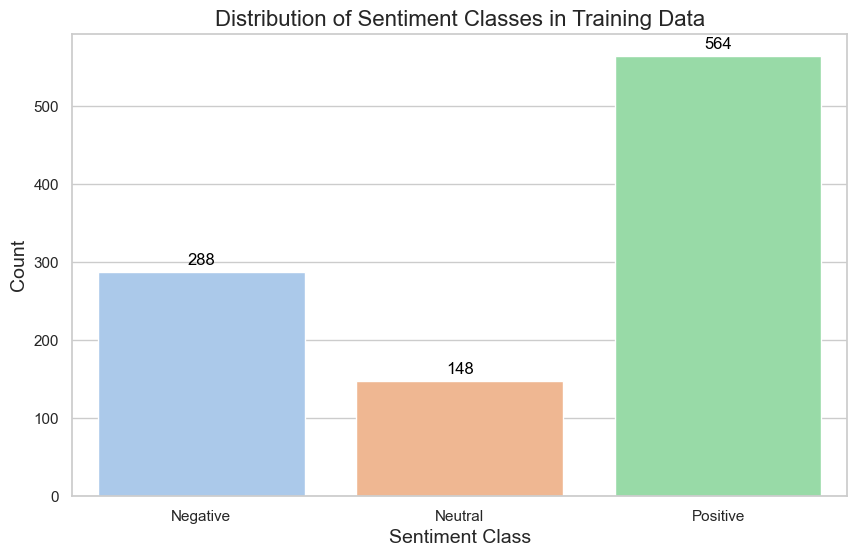

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Count plot for sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=sampled_df, x='True_Label', order=['Negative', 'Neutral', 'Positive'], palette='pastel')

# Add title and labels
plt.title('Distribution of Sentiment Classes in Training Data', fontsize=16)
plt.xlabel('Sentiment Class', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the counts above the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='baseline', 
                       fontsize=12, 
                       color='black', 
                       xytext=(0, 5), 
                       textcoords='offset points')

plt.xticks(rotation=0)
plt.show()

In [ ]:
sampled_df
sampled_df['LTR'] = pd.to_numeric(sampled_df['LTR'], errors='coerce')
sampled_df['Star Rating'] = pd.to_numeric(sampled_df['Star Rating'], errors='coerce')

def score_to_sentiment(row):
    if not pd.isna(row['LTR']):
        # Use LTR (0-10)
        if row['LTR'] <= 3:
            return 'Negative'
        elif row['LTR'] <= 6:
            return 'Neutral'
        else:
            return 'Positive'
    elif not pd.isna(row['Star Rating']):
        # Use Star_Rating (1-5)
        if row['Star_Rating'] <= 2:
            return 'Negative'
        elif row['Star_Rating'] == 3:
            return 'Neutral'
        else:
            return 'Positive'
    else:
        return 'Unknown'  
    
sampled_df['True_Label'] = sampled_df.apply(score_to_sentiment, axis=1)


print(sampled_df[['LTR', 'Star Rating', 'True_Label']].sample(20))
#print random enties to validate the labels


In [27]:
# Vectorize the entire dataset
X_full_vectorized = vectorizer.transform(sampled_df['Combined Text'])  # Use the same vectorizer

# Make predictions for the entire dataset
sampled_df['Predicted_Label_NB'] = nb.predict(X_full_vectorized)


In [50]:
textblobnb_accuracy_afterTrain_onothersample = accuracy_score(sampled_df['True_Label'], sampled_df['Predicted_Label_NB'])
print(" NB Accuracy:", textblobnb_accuracy_afterTrain_onothersample)

 NB Accuracy: 0.662


SVM


In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Define a TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform the text data to numerical features
X = tfidf.fit_transform(df_sa['Combined Text']).toarray()

# Target labels: Encode sentiment labels as numerical values
df_sa['Sentiment_Label_Numeric'] = df_sa['True_Label'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})
y = df_sa['Sentiment_Label_Numeric']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Initialize the Support Vector Classifier (SVC) with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [32]:
# Predict sentiment on the test set
y_pred = svm_model.predict(X_test)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive', 'Neutral']))


SVM Model Accuracy: 0.68
              precision    recall  f1-score   support

    Negative       0.62      0.73      0.67        59
    Positive       0.73      0.89      0.80       105
     Neutral       0.00      0.00      0.00        36

    accuracy                           0.68       200
   macro avg       0.45      0.54      0.49       200
weighted avg       0.57      0.68      0.62       200



In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_svm_model = grid_search.best_estimator_

# Evaluate the best model
best_pred = best_svm_model.predict(X_test)
best_accuracy = accuracy_score(y_test, best_pred)
print(f"Best SVM Model Accuracy: {best_accuracy:.2f}")


Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best SVM Model Accuracy: 0.69


In [36]:
# Transform the 'text' column of df_sa into TF-IDF features
X_sa = tfidf.transform(sampled_df['Combined Text']).toarray()

# Predict the sentiment labels using the trained SVM model
sampled_df['SVM_Predicted'] = svm_model.predict(X_sa)

# Map the numeric predictions back to sentiment labels ('Positive', 'Negative', 'Neutral')
sampled_df['SVM_Predicted_Label'] = sampled_df['SVM_Predicted'].map({1: 'Positive', 0: 'Negative', 2: 'Neutral'})

# Display the first few predictions
print(sampled_df[['Combined Text', 'SVM_Predicted_Label']].head())


                                           Combined Text SVM_Predicted_Label
25588  Because I have some difficulties to use it and...            Negative
30810  Bought a few weeks ago. Easy to install. Excel...            Positive
61411          Only recommend original HP ink! Best ink!            Positive
49186  IT was fine until it wasn't. The copies were g...            Positive
42104  The HP Ink service has charged me on 2 differe...            Negative


In [37]:
SVM_accuracy_afterTrain_onothersample = accuracy_score(sampled_df['True_Label'], sampled_df['SVM_Predicted_Label'])
print("SVM Overall Accuracy:", SVM_accuracy_afterTrain_onothersample)

SVM Overall Accuracy: 0.656


In [38]:
sampled_df.to_csv('SA_Random_Samples.csv', index=False)

Overall Compare for ML methods

In [42]:
# Check unique values in True_Label and predicted labels
print("Unique values in True_Label:", sampled_df['True_Label'].unique())
print("Unique values in SVM_Predicted_Label:", sampled_df['SVM_Predicted_Label'].unique())
print("Unique values in NB_Predicted_Label:", sampled_df['Predicted_Label_NB'].unique())


Unique values in True_Label: ['Positive' 'Negative' 'Neutral']
Unique values in SVM_Predicted_Label: ['Negative' 'Positive' 'Neutral']
Unique values in NB_Predicted_Label: ['Positive' 'Negative' 'Neutral']


In [43]:
from sklearn.metrics import classification_report

# Classification report for SVM
print("SVM Classification Report:")
svm_report = classification_report(sampled_df['True_Label'], sampled_df['SVM_Predicted_Label'], target_names=['Negative', 'Neutral', 'Positive'])
print(svm_report)

# Classification report for Naive Bayes
print("Naive Bayes Classification Report:")
nb_report = classification_report(sampled_df['True_Label'], sampled_df['Predicted_Label_NB'], target_names=['Negative', 'Neutral', 'Positive'])
print(nb_report)

SVM Classification Report:
              precision    recall  f1-score   support

    Negative       0.57      0.60      0.58       288
     Neutral       0.18      0.03      0.05       148
    Positive       0.71      0.85      0.78       564

    accuracy                           0.66      1000
   macro avg       0.49      0.49      0.47      1000
weighted avg       0.59      0.66      0.61      1000

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.60      0.60      0.60       288
     Neutral       0.12      0.03      0.04       148
    Positive       0.71      0.86      0.78       564

    accuracy                           0.66      1000
   macro avg       0.48      0.50      0.47      1000
weighted avg       0.59      0.66      0.62      1000



In [46]:
# Extract classification report as a dictionary
svm_report_dict = classification_report(sampled_df['True_Label'], sampled_df['SVM_Predicted_Label'], target_names=['Negative', 'Neutral', 'Positive'], output_dict=True)
nb_report_dict = classification_report(sampled_df['True_Label'], sampled_df['Predicted_Label_NB'], target_names=['Negative', 'Neutral', 'Positive'], output_dict=True)


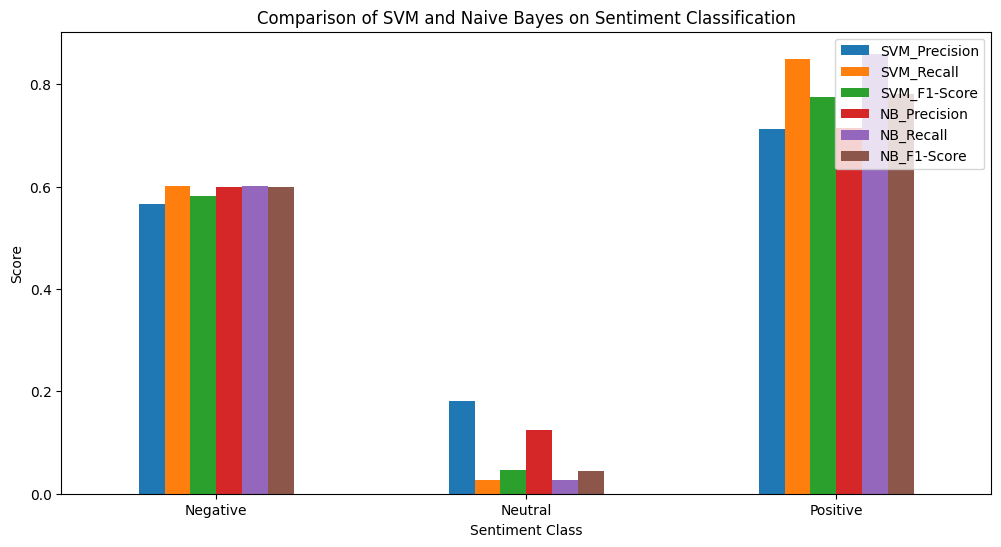

In [48]:
import pandas as pd

# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'SVM_Precision': [svm_report_dict['Negative']['precision'], svm_report_dict['Neutral']['precision'], svm_report_dict['Positive']['precision']],
    'SVM_Recall': [svm_report_dict['Negative']['recall'], svm_report_dict['Neutral']['recall'], svm_report_dict['Positive']['recall']],
    'SVM_F1-Score': [svm_report_dict['Negative']['f1-score'], svm_report_dict['Neutral']['f1-score'], svm_report_dict['Positive']['f1-score']],
    'NB_Precision': [nb_report_dict['Negative']['precision'], nb_report_dict['Neutral']['precision'], nb_report_dict['Positive']['precision']],
    'NB_Recall': [nb_report_dict['Negative']['recall'], nb_report_dict['Neutral']['recall'], nb_report_dict['Positive']['recall']],
    'NB_F1-Score': [nb_report_dict['Negative']['f1-score'], nb_report_dict['Neutral']['f1-score'], nb_report_dict['Positive']['f1-score']]
}, index=['Negative', 'Neutral', 'Positive'])

import matplotlib.pyplot as plt

# Plot the comparison of Precision, Recall, and F1-Score
metrics_df.plot(kind='bar', figsize=(12, 6))

# Add title and labels
plt.title('Comparison of SVM and Naive Bayes on Sentiment Classification')
plt.ylabel('Score')
plt.xlabel('Sentiment Class')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

